## Mounting Drive on Colab


In [ ]:
%cd '/content/drive/MyDrive/MIDAS Internship/train'

/content/drive/MyDrive/MIDAS Internship/train


In [ ]:
# import cv2
# img = cv2.imread('Sample002/img002-002.png')
# print(img.shape)
# img = cv2.resize(img , (30,40))
# plt.imshow(img)


## Importing the all Essential Libraries

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
from skimage import io
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

## Defining the Data Generators
Used to Load the Training and Validation data on the fly directly from the drive to train along with Data Augmentations

In [ ]:
input_shape = (75, 100, 1)
img_width = 75
img_height = 100
num_classes = 62
batch_size = 32
epochs = 10

train_data_dir = './'

datagen_args = dict( 
    rescale=1./255 ,
    rotation_range=10,
    zoom_range = 0.10,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.5,
    fill_mode = 'nearest',
    validation_split=0.2)
datagen = ImageDataGenerator(**datagen_args)
datagenerator = datagen.flow_from_directory(
    './',target_size=(img_width,img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode = 'categorical',
    # interpolation="lanczos",
    shuffle=True , 
    subset='training')

validation_generator = datagen.flow_from_directory(
    './', 
    target_size=(img_width,img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode = 'categorical',
    # interpolation="lanczos",
    shuffle=False ,
    subset='validation')

Found 1985 images belonging to 62 classes.
Found 496 images belonging to 62 classes.


## Some Specifications of the Training data

In [ ]:
print("Number of Samples in training : " , datagenerator.samples)
print("Number of Classes : " , len(datagenerator.class_indices))
print("Number of Samples per class : " , datagenerator.samples // len(datagenerator.class_indices))

Number of Samples in training :  1985
Number of Classes :  62
Number of Samples per class :  32


In [ ]:
print(datagenerator.class_indices)

{'Sample001': 0, 'Sample002': 1, 'Sample003': 2, 'Sample004': 3, 'Sample005': 4, 'Sample006': 5, 'Sample007': 6, 'Sample008': 7, 'Sample009': 8, 'Sample010': 9, 'Sample011': 10, 'Sample012': 11, 'Sample013': 12, 'Sample014': 13, 'Sample015': 14, 'Sample016': 15, 'Sample017': 16, 'Sample018': 17, 'Sample019': 18, 'Sample020': 19, 'Sample021': 20, 'Sample022': 21, 'Sample023': 22, 'Sample024': 23, 'Sample025': 24, 'Sample026': 25, 'Sample027': 26, 'Sample028': 27, 'Sample029': 28, 'Sample030': 29, 'Sample031': 30, 'Sample032': 31, 'Sample033': 32, 'Sample034': 33, 'Sample035': 34, 'Sample036': 35, 'Sample037': 36, 'Sample038': 37, 'Sample039': 38, 'Sample040': 39, 'Sample041': 40, 'Sample042': 41, 'Sample043': 42, 'Sample044': 43, 'Sample045': 44, 'Sample046': 45, 'Sample047': 46, 'Sample048': 47, 'Sample049': 48, 'Sample050': 49, 'Sample051': 50, 'Sample052': 51, 'Sample053': 52, 'Sample054': 53, 'Sample055': 54, 'Sample056': 55, 'Sample057': 56, 'Sample058': 57, 'Sample059': 58, 'Sampl

## An example of a batch of data load from the drive on the file using Data Generators

In [ ]:
x,y = next(datagenerator)
print("x.shape : " , x.shape)
print("y.shape : " , y.shape)


x.shape :  (32, 75, 100, 1)
y.shape :  (32, 62)


## Visualisation of images from various classes present in the Data

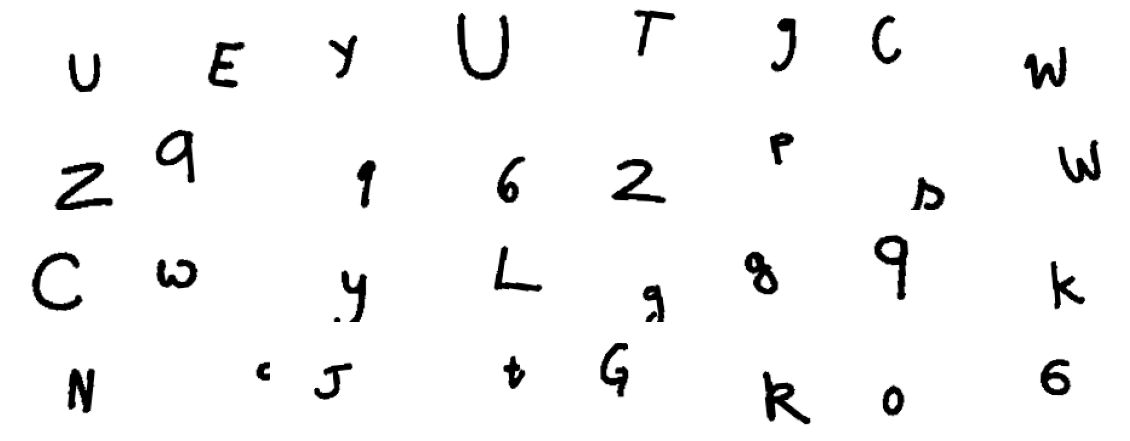

In [ ]:
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        # if show_labels:
        #     ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')



show_grid(x,4,8,show_labels=True,figsize=(20,10))


## Visualisation of the Augmentations to the data of a single class 
Note : Shuffle is *False* to get an image of a known class

Found 2481 images belonging to 62 classes.


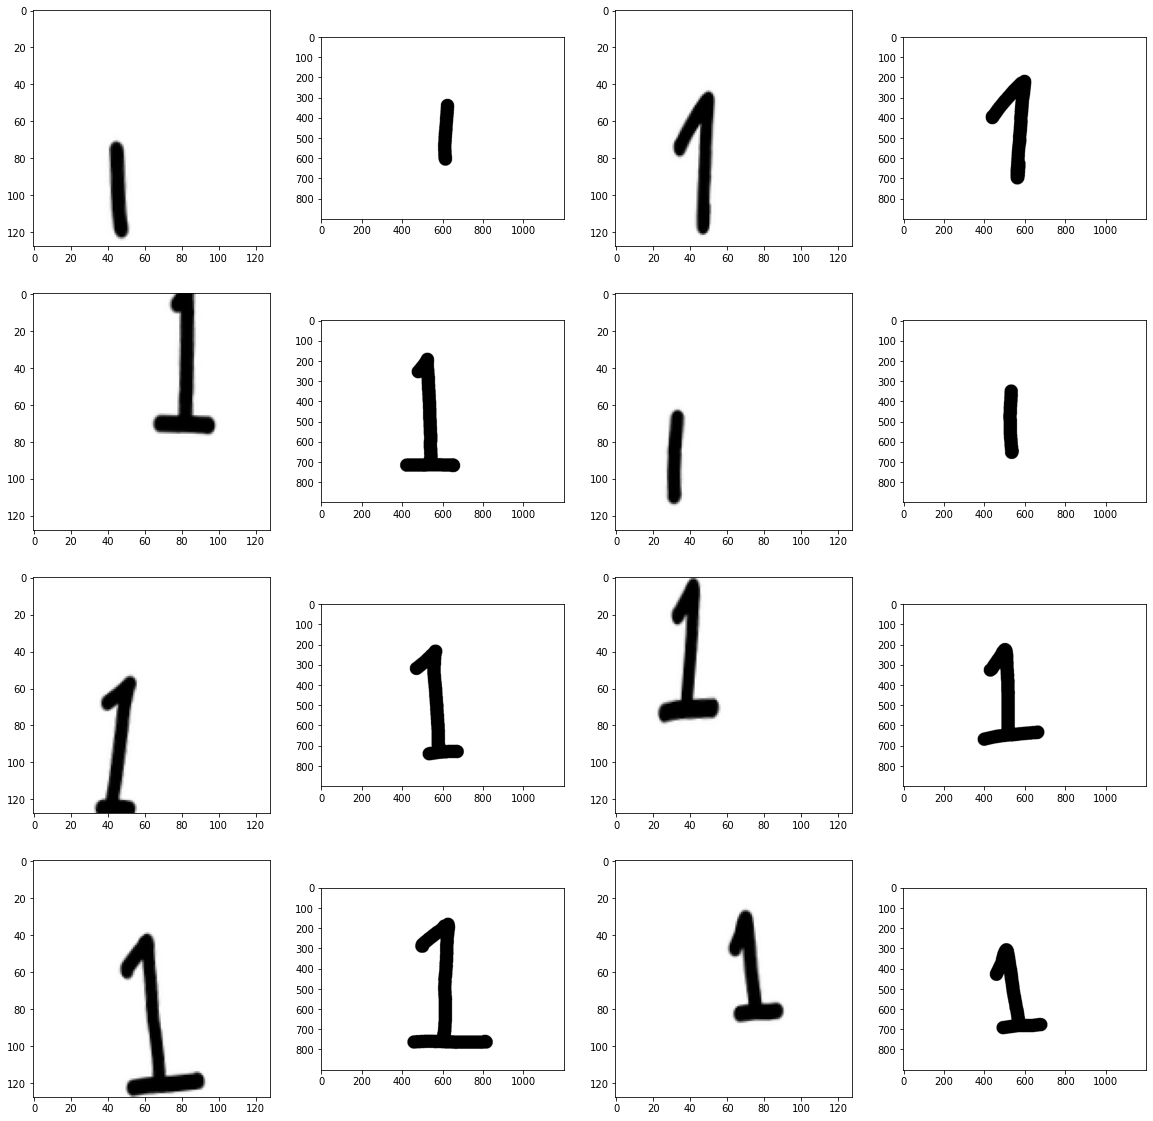

In [ ]:
#Shuffle has been set to False
dgen_no_shuffle = datagen.flow_from_directory('./',target_size=(128,128),batch_size=32,interpolation="lanczos",shuffle=False)
 
# We get the third batch
dgen_no_shuffle.reset() #resets the generator to the first batch
for i in range(3):
    x1,y1 = next(dgen_no_shuffle)
    y1_int = np.argmax(y1,axis=-1)
 
#Plot the batch images w.r.t. the dataset images.
plt.figure(figsize=(20,20))
idx=1
for i in range(8):
    plt.subplot(4,4,idx)
    idx+=1
    plt.imshow(x1[i].reshape(128,128,3))
    plt.subplot(4,4,idx)
    plt.imshow(io.imread(os.path.join(dgen_no_shuffle.directory,dgen_no_shuffle.filenames[(dgen_no_shuffle.batch_index-1)*32+i])))
    idx+=1


## Dynamically Plot the Training and validation loss with each epoch 
To be used as a callback Function

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt 
import keras

class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

## Defining the Best model Architecture
Derived from the experimentations conducted in *Experimenting_with_CNN_Architectures.ipynb*

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 1
model = [0] *nets

j=0
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
model[j].add(MaxPooling2D())
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dense(62, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Summarising the Model Architecture

In [ ]:
model[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 71, 96, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21120)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               5406976   
_________________________________________________________________
dense_1 (Dense)              (None, 62)                1

## Compiling the Model 


*   annealer : Used to decrease the learning rate in each epoch
*   cp_callback : Used to checkpoint the model if validation accuracy increases
*   plot_losses : Used to Dynamically plot the training and Validation Loss at with epoch 
*   model.fit_generator : Augments the data and trains the model on it





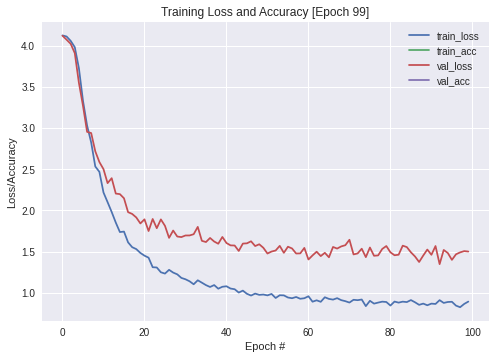

CNN 1: Epochs=100, Train accuracy=0.76139, Validation accuracy=0.61250


In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

checkpoint_path = "/content/drive/MyDrive/MIDAS Internship/train_ckpt/cp_final.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', mode='max',save_best_only=True, verbose=1)

# TRAIN NETWORKS
history = [0] * nets
epochs = 100
for j in range(nets):

  history[j] = model[j].fit_generator(datagenerator, 
                           steps_per_epoch= datagenerator.samples // batch_size,
                           epochs=epochs, 
                           validation_data=validation_generator, 
                           validation_steps=validation_generator.samples // batch_size, 
                          #  verbose=0, 
                           callbacks=[cp_callback,plot_losses,annealer],
                           workers=8
                           )
  print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
                                    j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))
  

## Defining a Fresh Model Architecture
Introducing Dropout Layers with value of Dropout = 0.05 because model Overfits the Data.

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 1
model = [0] *nets

j=0
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
model[j].add(MaxPooling2D())
model[j].add(Dropout(0.05))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Dropout(0.05))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dropout(0.05))
model[j].add(Dense(62, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Compiling the new Model 


*   annealer : Used to decrease the learning rate in each epoch
*   cp_callback : Used to checkpoint the model if validation accuracy increases
*   plot_losses : Used to plot the training and Validation Loss at with epoch 
*   model.fit_generator : Augments the data and trains the model on it







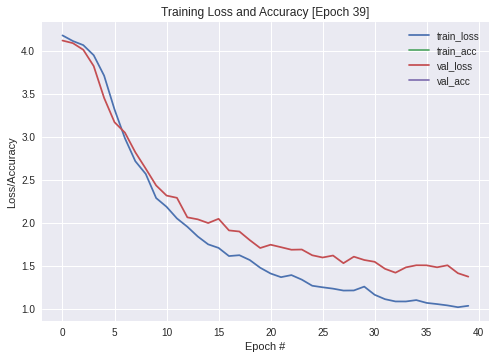

CNN 1: Epochs=40, Train accuracy=0.69278, Validation accuracy=0.58750


In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

checkpoint_path = "/content/drive/MyDrive/MIDAS Internship/train_ckpt/cp_final.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', mode='max',save_best_only=True, verbose=1)

# TRAIN NETWORKS
history = [0] * nets
epochs = 40
for j in range(nets):

  history[j] = model[j].fit_generator(datagenerator, 
                           steps_per_epoch= datagenerator.samples // batch_size,
                           epochs=epochs, 
                           validation_data=validation_generator, 
                           validation_steps=validation_generator.samples // batch_size, 
                          #  verbose=0, 
                           callbacks=[plot_losses,annealer],
                           workers=8
                           )
  print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
                                    j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))
  

## Note : The Model Still over fits the Data. Hence I increased the Dropout value to 0.1 from 0.05 

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 1
model1 = [0] *nets

j=0
model1[j] = Sequential()
model1[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
model1[j].add(MaxPooling2D())
model1[j].add(Dropout(0.1))
model1[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model1[j].add(MaxPooling2D())
model1[j].add(Dropout(0.1))
model1[j].add(Flatten())
model1[j].add(Dense(256, activation='relu'))
model1[j].add(Dropout(0.1))
model1[j].add(Dense(62, activation='softmax'))
model1[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

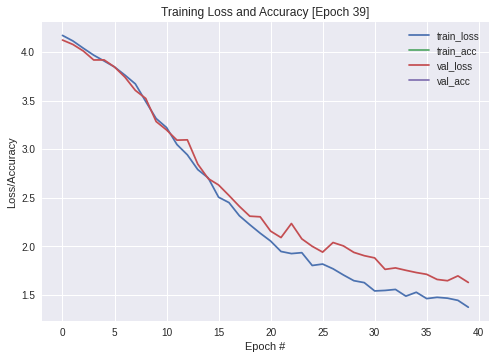

CNN 1: Epochs=40, Train accuracy=0.59089, Validation accuracy=0.55000


In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

checkpoint_path = "/content/drive/MyDrive/MIDAS Internship/train_ckpt/cp_final.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', mode='max',save_best_only=True, verbose=1)

# TRAIN NETWORKS
history = [0] * nets
epochs = 40
for j in range(nets):

  history[j] = model1[j].fit_generator(datagenerator, 
                           steps_per_epoch= datagenerator.samples // batch_size,
                           epochs=epochs, 
                           validation_data=validation_generator, 
                           validation_steps=validation_generator.samples // batch_size, 
                          #  verbose=0, 
                           callbacks=[plot_losses,annealer],
                           workers=8
                           )
  print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
                                    j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))
  

## Note: The Problem of overfitting is reduced significantly because of the Intrroduction to Dropout Layer

## Note : We could've used Ensembling of more Models to get Better Accuracy, but because of the limited time and computational resources, I've limited this notebook to just one model 

# Resources Used :

  
* Chris Deotte's Kaggle Kernel : https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist

* Blog for using Data generators : https://towardsdatascience.com/image-data-generators-in-keras-7c5fc6928400

*   Plot losses dinamically while training : https://medium.com/@kapilvarshney/how-to-plot-the-model-training-in-keras-using-custom-callback-function-and-using-tensorboard-41e4ce3cb401
 
* Stack overflow for general programming doubts : https://stackoverflow.com/ 

* Official Documentation of python libraries










